<a href="https://colab.research.google.com/github/Abishethvarman/AG-AgriExpert-RAG/blob/main/RAGCrop_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries & Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,log_loss

### Load Dataset from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 18APC3538_Research_Proposal.gdoc
'19APC3970_DBMS_Class Assignment 1.zip'
 19APC3970-English.pdf
 19APC3970_FWT_QUIZ02.pdf
'19APC3970 HTML-01 (1).zip'
'19APC3970 HTML-01.zip'
'19APC3970 HTML _1.rar'
 19APC3970.LOG2.docx
 19APC3970.LOG.docx
 19APC3970_QUIZ02.pdf
 19APC3970-Quiz03.pdf
 20240216_091107.jpg
 20240216_091245.jpg
 20240216_091320.jpg
 20240216_095746.jpg
 20240216_170935.jpg
 Abstract
 Abstract.gdoc
'ADScAI_142_Payment (1).pdf'
 ADScAI_142_Payment.pdf
 Artwork-Gobihanath
 Attendence1.jpg
'Author Declaration Form IRCFoT-2025_V2.docx'
'Balancing Academic and Non-Academic Workload: Stress Assessment .gform'
'Balancing Academic and Non-Academic Workload: Stress Assessment  (Responses).gsheet'
 Banana1.jpg
 Banana2.jpg
 BI-Report.gdoc
'CamScanner 08-26-2022 13.34.jpg'
'CamScanner 11-05-2021 11.58_1.pdf'
'CamScanner 11-05-2021 11.58.pdf'
'Capstone Project - Group 22'
 CIS
 Classroom
'Colab Notebooks'
'Community Doc.gdoc'
'data - final.xlsx'
 Dataset
 Dia

In [ ]:
%cd /content/gdrive/MyDrive/Dataset

/content/gdrive/MyDrive/Dataset


In [ ]:
df = pd.read_csv("final_augmented_crop_dataset_80_features.csv")

### Preprocess & Cleaning

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,Zinc (Zn),Iron (Fe),...,Avg Rainfall,Max Humidity,Min Humidity,Avg Humidity,Max Solar Radiation,Min Solar Radiation,Avg Solar Radiation,Max Wind Speed,Min Wind Speed,Avg Wind Speed
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 83 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   N                               2200 non-null   int64  
 1   P                               2200 non-null   int64  
 2   K                               2200 non-null   int64  
 3   temperature                     2200 non-null   float64
 4   humidity                        2200 non-null   float64
 5   ph                              2200 non-null   float64
 6   rainfall                        2200 non-null   float64
 7   label                           2200 non-null   object 
 8   Zinc (Zn)                       0 non-null      float64
 9   Iron (Fe)                       0 non-null      float64
 10  Manganese (Mn)                  0 non-null      float64
 11  Copper (Cu)                     0 non-null      float64
 12  Boron (B)                       0 

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,Zinc (Zn),Iron (Fe),Manganese (Mn),...,Avg Rainfall,Max Humidity,Min Humidity,Avg Humidity,Max Solar Radiation,Min Solar Radiation,Avg Solar Radiation,Max Wind Speed,Min Wind Speed,Avg Wind Speed
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Model Development

In [ ]:
##### Split 20% of the dataset for validation, keeping 80% for training and testing
df_train_test, df_val = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print(f"Training and Testing Data Count: {df_train_test.shape[0]}")
print(f"Validation Data Count: {df_val.shape[0]}")

Training and Testing Data Count: 1760
Validation Data Count: 440


## Training

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def model_training(df_train_test, df_val):
    """
    Trains a RandomForest model on df_train_test and validates on df_val.
    Drops features that are fully NaN. Remaining NaNs are filled with 0.
    Parameters:
        df_train_test : Training and test dataset (80%)
        df_val : Validation dataset (20%)
    Returns:
        Trained RandomForest model
    """

    feature_cols = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
    'Zinc (Zn)', 'Iron (Fe)', 'Manganese (Mn)', 'Copper (Cu)',
    'Boron (B)', 'Molybdenum (Mo)', 'soil salinity', 'Soil Texture',
    'Sulfur (S)', 'Chlorine (Cl)', 'Soil Respiration Rate', 'Porosity (%)',
    'Bulk Density', 'Base Saturation (%)', 'Calcium (Ca)', 'Magnesium (Mg)', 'Silicon (Si)',
    'Electrical Conductivity (EC)', 'Cation Exchange Capacity (CEC)', 'Buffer pH',
    'Organic Carbon (OC)', 'Organic Matter (OM)',
    'Soil Texture (sand)', 'Soil Texture (silt)', 'Soil Texture (clay)',
    'Water Holding Capacity', 'Soil Moisture Content', 'Soil Temperature',
    'Solar Radiation', 'Wind Speed', 'Evapotranspiration',
    'Crop Rotation', 'Fertilizer Type', 'Fertilizer Application Rate',
    'Fertilizer Timing', 'Irrigation Type', 'Irrigation Volume',
    'Tillage Method', 'Cover Crops', 'Pesticide Use', 'Herbicide Use',
    'Elevation', 'Slope Gradient', 'Slope Aspect',
    'Microbial Biomass', 'Earthworm Count', 'Soil Enzyme Activity',
    'Latitude', 'Longitude', 'Soil Depth', 'Season', 'Year', 'Historical Land Use',
    'Max Temperature', 'Min Temperature', 'Avg Temperature',
    'Max Rainfall', 'Min Rainfall', 'Avg Rainfall',
    'Max Humidity', 'Min Humidity', 'Avg Humidity',
    'Max Solar Radiation', 'Min Solar Radiation', 'Avg Solar Radiation',
    'Max Wind Speed', 'Min Wind Speed', 'Avg Wind Speed'
]



    # Drop features that are entirely null
    feature_cols = [col for col in feature_cols if col in df_train_test.columns and df_train_test[col].notna().any()]

    # Identify categorical columns
    categorical_cols = ['Soil Texture']
    categorical_cols = [col for col in categorical_cols if col in feature_cols]

    # Fill remaining NaNs with 0 and apply encoding
    X = df_train_test[feature_cols].copy()
    X[categorical_cols] = X[categorical_cols].astype('category')
    X = pd.get_dummies(X, columns=categorical_cols)
    X.fillna(0, inplace=True)

    y = df_train_test['label']
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Train-test split from the 80% chunk
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train model
    model = RandomForestClassifier(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)

    ########## Predict on the test set
    y_test_pred = model.predict(X_test)

    print("\nTesting Dataset Performance (from 80% Train/Test split)\n")
    print("#" * 100)

    # Performance Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    train_loss = log_loss(y_train, y_train_prob)
    test_loss = log_loss(y_test, y_test_prob)

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    ########## VALIDATION ON df_val
    print("\nValidation Dataset Performance (on held-out 20%)\n")
    print("#" * 100)

    X_val = df_val[feature_cols].copy()
    X_val[categorical_cols] = X_val[categorical_cols].astype('category')
    X_val = pd.get_dummies(X_val, columns=categorical_cols)
    X_val = X_val.reindex(columns=X.columns, fill_value=0)
    X_val.fillna(0, inplace=True)

    y_val = le.transform(df_val['label'])

    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)

    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    val_loss = log_loss(y_val, y_val_prob)

    print(f"Accuracy: {val_accuracy * 100:.2f}%")
    print(f"Precision: {val_precision * 100:.2f}%")
    print(f"Recall: {val_recall * 100:.2f}%")
    print(f"F1 Score: {val_f1 * 100:.2f}%")
    print(f"Validation Loss: {val_loss:.4f}")

    return model, y_val, y_val_pred, le

# Example usage
# df = pd.read_csv("augmented_crop_dataset.csv")
df_train_test, df_val = train_test_split(df, test_size=0.2, random_state=42)
model, y_val, y_val_pred, le = model_training(df_train_test, df_val)



Testing Dataset Performance (from 80% Train/Test split)

####################################################################################################
Accuracy: 99.81%
Precision: 99.82%
Recall: 99.81%
F1 Score: 99.81%
Train Loss: 0.0225
Test Loss: 0.0781

Validation Dataset Performance (on held-out 20%)

####################################################################################################
Accuracy: 98.86%
Precision: 98.97%
Recall: 98.86%
F1 Score: 98.87%
Validation Loss: 0.0840


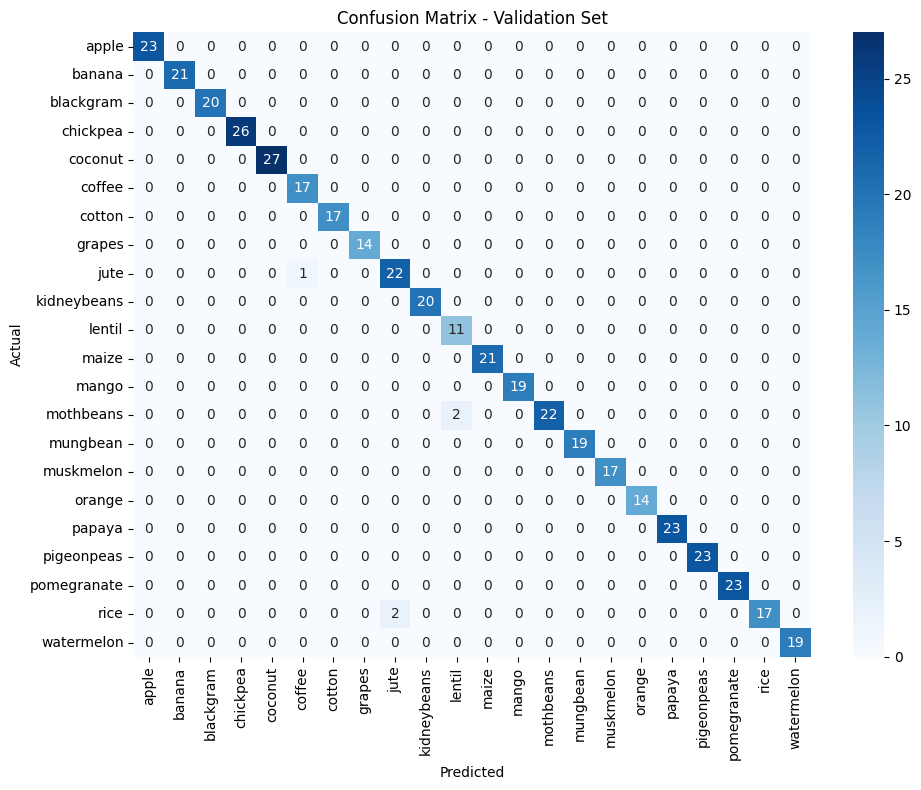

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
labels = le.classes_

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
print(df['label'].value_counts(normalize=True))


label
rice           0.045455
maize          0.045455
chickpea       0.045455
kidneybeans    0.045455
pigeonpeas     0.045455
mothbeans      0.045455
mungbean       0.045455
blackgram      0.045455
lentil         0.045455
pomegranate    0.045455
banana         0.045455
mango          0.045455
grapes         0.045455
watermelon     0.045455
muskmelon      0.045455
apple          0.045455
orange         0.045455
papaya         0.045455
coconut        0.045455
cotton         0.045455
jute           0.045455
coffee         0.045455
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



LIME Explanation for Instance Index 0:


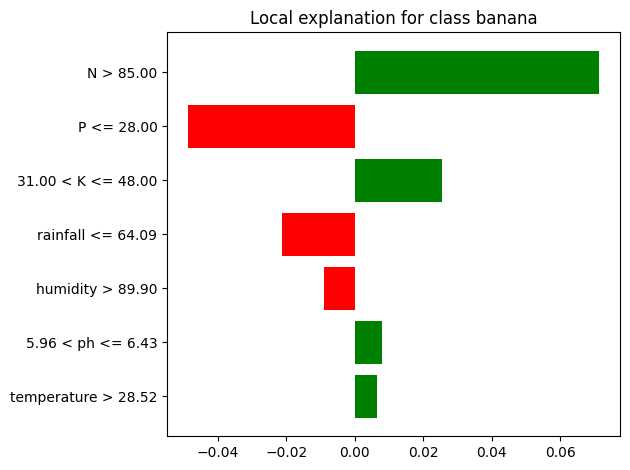

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the subset of features for LIME explanation display (optional, LIME works on all features)
# lime_feature_cols = ['N', 'P', 'K', 'ph', 'humidity', 'rainfall', 'temperature']

# Define the categorical columns that need encoding *if they are present in the data being processed*
all_categorical_cols = ['Soil Texture'] # Add any other categorical columns from your dataset

def preprocess_for_lime(data, trained_columns, all_categorical_cols):
    """
    Applies the same preprocessing steps as training to match the model's input.
    Ensures the output DataFrame has the same columns as the training data.

    Parameters:
        data (pd.DataFrame): The input data (e.g., a single row or a subset).
        trained_columns (list): The list of column names the model was trained on.
        all_categorical_cols (list): List of all original categorical column names
                                     in the dataset that were one-hot encoded during training.

    Returns:
        pd.DataFrame: Processed DataFrame with columns matching the trained model.
    """
    X = data.copy()

    # Identify which of the 'all_categorical_cols' are actually present in the current data subset 'X'
    categorical_cols_in_data = [col for col in all_categorical_cols if col in X.columns]

    # Apply categorical encoding only to columns present and specified as categorical
    if categorical_cols_in_data:
        # Ensure they are treated as categorical before get_dummies
        for col in categorical_cols_in_data:
             if pd.api.types.is_object_dtype(X[col]) or pd.api.types.is_string_dtype(X[col]):
                 X[col] = X[col].astype('category')


        X = pd.get_dummies(X, columns=categorical_cols_in_data)


    # Reindex to match the training columns and fill missing with 0
    # This is crucial because the model was trained on all features
    X_full = pd.DataFrame(0, index=X.index, columns=trained_columns)
    # Use .align to safely copy data from X to X_full based on matching columns
    X_full, _ = X_full.align(X, join='left', axis=1, fill_value=0)

    # Ensure correct columns are taken from X
    for col in X.columns:
         if col in X_full.columns:
              X_full[col] = X[col]


    X_full.fillna(0, inplace=True) # Fill any remaining NaNs (shouldn't be many after alignment)

    return X_full

# Get the list of features the model was trained on
trained_features = list(model.feature_names_in_) # Convert to list for easier manipulation

# Prepare the training data for the explainer using the full set of trained features
# and indicating the original categorical columns for get_dummies inside the function
training_data_processed = preprocess_for_lime(df_train_test, trained_features, all_categorical_cols)

# Identify the indices of the original categorical columns *within the trained features*
# This is needed by LIME's explainer to handle dummy variables correctly
categorical_features_indices = [trained_features.index(col) for col in all_categorical_cols if col in trained_features]


# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=training_data_processed.values, # Use the fully processed training data
    feature_names=trained_features, # Use the full list of trained feature names
    class_names=le.classes_,
    mode='classification',
    # Pass the indices of the *original* categorical features (if they exist in trained_features)
    # LIME uses these indices to group dummy variables when generating explanations.
    categorical_features=[trained_features.index(col) for col in all_categorical_cols if col in trained_features],
    random_state=42
)

# Choose an instance from your validation set (df_val) to explain
instance_idx = 0 # You can change this index to explain a different instance
instance = df_val.iloc[[instance_idx]] # Pass as a DataFrame slice to maintain structure

# Preprocess the instance for prediction using the full set of features
# Use the same preprocess_for_lime function
instance_processed_full = preprocess_for_lime(instance, trained_features, all_categorical_cols)


# Explain the prediction for this instance
# LIME expects the data_row to have the same features as the training_data provided to explainer
# We take the values from the single row DataFrame slice
explanation = explainer.explain_instance(
    data_row=instance_processed_full.iloc[0].values,
    predict_fn=model.predict_proba,
    num_features=10 # Number of features to show in the explanation
)

# Visualize the explanation
print(f"\nLIME Explanation for Instance Index {instance_idx}:")
explanation.as_pyplot_figure()
plt.tight_layout()
plt.show()

# You can also get the explanation as a list of tuples (feature, weight)
# print("\nExplanation as list:")
# print(explanation.as_list())

## Save model

In [ ]:
import joblib
from google.colab import drive
drive.mount('/content/drive')

# Specify the path where you want to save the model
path = '/content/drive/My Drive/Trained_Models/Agri_DreamHack/ragcrop_model_v1.pkl'

# Save the model to the specified path
joblib.dump(model, path)

Mounted at /content/drive


['/content/drive/My Drive/Trained_Models/Agri_DreamHack/ragcrop_model_v1.pkl']

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Rebuild validation features to match training
feature_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
        'Zinc (Zn)', 'Iron (Fe)', 'Manganese (Mn)', 'Copper (Cu)',
        'Boron (B)', 'Molybdenum (Mo)', 'soil salinity', 'Soil Texture',
        'Sulfur (S)', 'Chlorine (Cl)', 'Soil Respiration Rate', 'Porosity (%)',
        'Bulk Density', 'Base Saturation (%)', 'Calcium (Ca)', 'Magnesium (Mg)', 'Silicon (Si)']
categorical_cols = ['soil_type', 'previous_crop']

# Step 2: One-hot encode categorical features
X_val = df_val[feature_cols].copy()
X_val = pd.get_dummies(X_val, columns=categorical_cols)
X_val = X_val.reindex(columns=model.feature_names_in_, fill_value=0)

# Step 3: Ensure all columns are numeric
X_val = X_val.apply(pd.to_numeric, errors='coerce').astype(np.float64)
X_val = X_val.dropna()

# Step 4: SHAP explanation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

# Step 5: Group one-hot columns into original features
grouped_features = {
    "N": ["N"],
    "P": ["P"],
    "K": ["K"],
    "temperature": ["temperature"],
    "humidity": ["humidity"],
    "ph": ["ph"],
    "rainfall": ["rainfall"],
    "Zinc (Zn)": ["Zinc (Zn)"],
    "Iron (Fe)": ["Iron (Fe)"],
    "Manganese (Mn)": ["Manganese (Mn)"],
    "Copper (Cu)": ["Copper (Cu)"],
    "Boron (B)": ["Boron (B)"],
    "Molybdenum (Mo)": ["Molybdenum (Mo)"],
    "soil salinity": ["soil salinity"],
    "Soil Texture": [col for col in X_val.columns if col.startswith("Soil Texture_")],
    "Sulfur (S)": ["Sulfur (S)"],
    "Chlorine (Cl)": ["Chlorine (Cl)"],
    "Soil Respiration Rate": ["Soil Respiration Rate"],
    "Porosity (%)": ["Porosity (%)"],
    "Bulk Density": ["Bulk Density"],
    "Base Saturation (%)": ["Base Saturation (%)"],
    "Calcium (Ca)": ["Calcium (Ca)"],
    "Magnesium (Mg)": ["Magnesium (Mg)"],
    "Silicon (Si)": ["Silicon (Si)"]
}


# Step 6: Aggregate SHAP values by group
group_shap_values = []
group_feature_names = []

# Select class index to explain (e.g., 0 for binary or one class of multiclass)
class_idx = 0

for feature, cols in grouped_features.items():
    indices = [X_val.columns.get_loc(c) for c in cols if c in X_val.columns]
    grouped_value = np.sum(np.abs(shap_values[class_idx][:, indices]), axis=1)
    group_shap_values.append(grouped_value)
    group_feature_names.append(feature)

# Convert to [samples x features] matrix
group_shap_matrix = np.array(group_shap_values).T

# Step 7: Plot grouped SHAP summary
plt.figure(figsize=(10, 6))
shap.summary_plot(group_shap_matrix, features=group_shap_matrix, feature_names=group_feature_names)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-3d84326768f3>", line 1, in <cell line: 0>
    import shap
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1138, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 1078, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1507, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1476, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1434, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    st